In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.impute import SimpleImputer

In [2]:
traindf=pd.read_csv('train.csv')
testdf=pd.read_csv('test.csv')

#Combine both df so whatever manipulation can be applied to both dfs in a loop
combdf=[traindf,testdf]

In [3]:
traindf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
traindf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Show the amount of nulls in each column
traindf.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

C:\Users\Zysoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

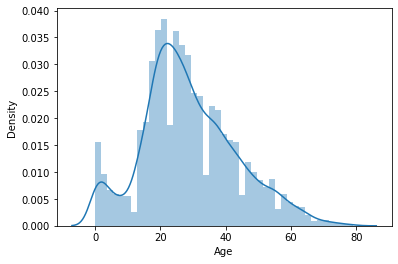

In [7]:
sns.distplot(traindf['Age'])

In [8]:
traindf.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
traindf.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [10]:
traindf['Cabin'].head()


0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [11]:
for df2 in combdf:  
    new=df2['Cabin'].str.split('/',expand=True)
    df2['CabinDeck']=new[0]
    df2['CabinNum']=new[1]
    df2['CabinSide']=new[2]
    #df2=df2.drop(columns=['Cabin'])
    new_2=df2['Name'].str.split(' ',expand=True)
    df2['FirstName']=new_2[0]
    df2['LastName']=new_2[1]
traindf=traindf.drop(columns=['Cabin'])
testdf=testdf.drop(columns=['Cabin'])
combdf=[traindf,testdf]
traindf.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide,FirstName,LastName
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,Maham,Ofracculy
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,Juanna,Vines
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,Altark,Susent
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,Solam,Susent
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,Willy,Santantines


In [12]:
traindf['LastName'].value_counts()

Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: LastName, Length: 2217, dtype: int64

### Categorical Features

- HomePlanet, CryoSleep, Destination, dVIP only has 2-3 unique variables
- some cabins are shared

## Correlation Investigation

In [13]:
# Whats the mean value of Transported
traindf['Transported'].mean()

0.5036236051995858

In [14]:
#Pivoting Features

traindf[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [15]:
#Pivoting Features

traindf[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [16]:
#Pivoting Features

traindf[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


In [17]:
traindf[['CabinDeck', 'Transported']].groupby(['CabinDeck'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CabinDeck,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


In [18]:
traindf[['CabinSide', 'Transported']].groupby(['CabinSide'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CabinSide,Transported
1,S,0.555037
0,P,0.451260


In [19]:
traindf[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [20]:
traindf[['LastName', 'Transported']].groupby(['LastName'], as_index=False).agg({'Transported':'mean',
                                                                          'LastName':'count'}).sort_values(by='LastName',ascending=False).head(10)


,Transported,LastName
356,0.388889,18
1447,0.375000,16
1205,0.266667,15
604,0.933333,15
818,0.357143,14
347,0.500000,14
799,0.428571,14
260,0.642857,14
979,0.615385,13
113,0.769231,13


In [21]:
traindf[['FirstName', 'Transported']].groupby(['FirstName'], as_index=False).agg({'Transported':'mean',
                                                                          'FirstName':'count'}).sort_values(by='FirstName',ascending=False).head(10)


,Transported,FirstName
1282,0.153846,13
1568,0.583333,12
1442,0.545455,11
703,0.363636,11
1168,0.363636,11
1078,0.545455,11
72,0.400000,10
364,0.200000,10
1573,0.200000,10
397,0.400000,10


## Findings
- CabinDeck is a good feature
- CabinSide not as important
- CryoSleep, HomePlanet, VIP are good features
- First and last names are bad features

#### Create a New Feature
Total Spent

In [90]:
traindf['TotalSpent']=traindf[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
testdf['TotalSpent']=testdf[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
traindf['TotalSpent']

0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
8688     8536.0
8689        0.0
8690     1873.0
8691     4637.0
8692     4826.0
Name: TotalSpent, Length: 8693, dtype: float64

In [23]:
traindf

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide,FirstName,LastName,TotalSpent
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,Maham,Ofracculy,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,Juanna,Vines,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,Altark,Susent,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,Solam,Susent,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,Willy,Santantines,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,Gravior,Noxnuther,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,Kurta,Mondalley,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,Fayey,Connon,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,Celeon,Hontichre,4637.0


In [24]:
traindf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'CabinDeck', 'CabinNum', 'CabinSide', 'FirstName',
       'LastName', 'TotalSpent'],
      dtype='object')

In [25]:
traindf['Transported']=traindf['Transported'].astype(int)
#df['VIP']=df['VIP'].astype(int)
#df['CryoSleep']=df['CryoSleep'].astype(int)
cols=['CryoSleep','VIP']
for df in combdf: 
    for col in cols:
        df.loc[df[col]==True,col]=1
        df.loc[df[col]==False,col]=0

In [26]:
planet_map={'Earth':1,"Europa":2,'Mars':3}
for df in combdf:
    df['HomePlanet']=df['HomePlanet'].map(planet_map)
    df['HomePlanet']=df['HomePlanet'].fillna(0)

In [27]:
traindf['HomePlanet'].value_counts()

1.0    4602
2.0    2131
3.0    1759
0.0     201
Name: HomePlanet, dtype: int64

In [28]:
destlist=list(set(traindf['Destination'].values.tolist()))
destmap={destlist[0]:1,destlist[2]:2,destlist[3]:3}
for df in combdf:
    df['Destination']=df['Destination'].map(destmap)
    df['Destination']=df['Destination'].fillna(0)

In [29]:
traindf['CabinDeck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

### Age Bands

In [30]:
traindf['AgeBand'] = pd.cut(traindf['Age'], 5)
traindf[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Transported
0,"(-0.079, 15.8]",0.648387
1,"(15.8, 31.6]",0.474293
2,"(31.6, 47.4]",0.485510
3,"(47.4, 63.2]",0.486747
4,"(63.2, 79.0]",0.463235


In [31]:
for df in combdf:    
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age']
traindf.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide,FirstName,LastName,TotalSpent,AgeBand
0,0001_01,2.0,0,1.0,2.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,Maham,Ofracculy,0.0,"(31.6, 47.4]"
1,0002_01,1.0,0,1.0,1.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,Juanna,Vines,736.0,"(15.8, 31.6]"
2,0003_01,2.0,0,1.0,3.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,Altark,Susent,10383.0,"(47.4, 63.2]"
3,0003_02,2.0,0,1.0,2.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,Solam,Susent,5176.0,"(31.6, 47.4]"
4,0004_01,1.0,0,1.0,0.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,Willy,Santantines,1091.0,"(15.8, 31.6]"


In [32]:
for df in combdf:
    df=pd.get_dummies(df,columns=['CabinDeck'],prefix = ['cd_'])

In [33]:
traindf=pd.get_dummies(traindf,columns=['CabinDeck'],prefix = ['cd_'])
#traindf.columns
cd_cols=traindf.columns.tolist()[::-1][:8]
testdf=pd.get_dummies(testdf,columns=['CabinDeck'],prefix = ['cd_'])
cd_cols

['cd__T', 'cd__G', 'cd__F', 'cd__E', 'cd__D', 'cd__C', 'cd__B', 'cd__A']

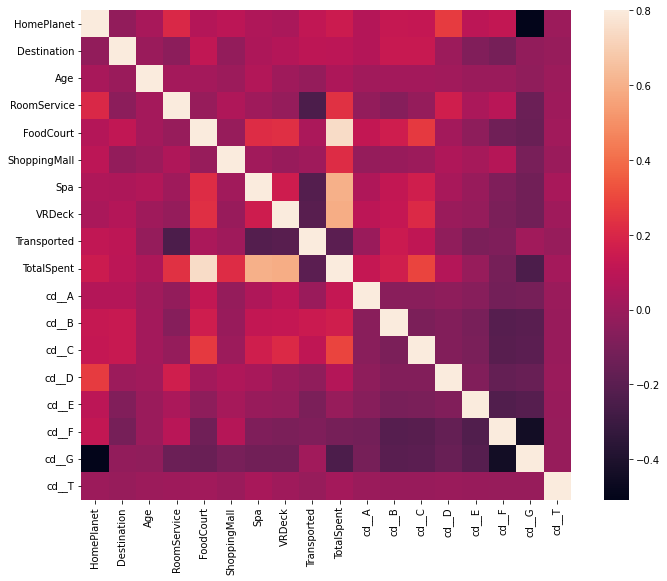

In [34]:
corrmat = traindf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.8, square=True);

### Missing Data


In [35]:
#traindf[cols_keep].head(30)

In [94]:
cols_keep=['HomePlanet','CryoSleep','Destination','Age','VIP','CabinNum','FoodCourt','ShoppingMall','Spa','VRDeck','RoomService','TotalSpent']
#for df in combdf:
X=traindf[cols_keep]
imp=SimpleImputer(missing_values=np.nan,strategy='median')#missing_values=np.nan
imp.fit(X)
Xtrain=pd.DataFrame(imp.transform(X),columns=X.columns)


    #X=X.fillna(X.median())
    


In [95]:
traindf[cols_keep].isnull().sum()

HomePlanet        0
CryoSleep       217
Destination       0
Age             179
VIP             203
CabinNum        199
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
RoomService     181
TotalSpent        0
dtype: int64

In [96]:
Xtrain=pd.merge(Xtrain,traindf[cd_cols],left_index=True,right_index=True)


In [97]:
Xtrain.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
CabinNum        0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
RoomService     0
TotalSpent      0
cd__T           0
cd__G           0
cd__F           0
cd__E           0
cd__D           0
cd__C           0
cd__B           0
cd__A           0
dtype: int64

In [98]:
#Y=traindf['Transported']#.reshape(-1,1)
#Xtrain=Xtrain.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(Xtrain,Y,random_state=0)

## Model Training and Score

In [99]:
Y=traindf['Transported']#.reshape(-1,1)
#Xtrain=Xtrain.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(Xtrain,Y,random_state=0)
    
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.14

<BarContainer object of 20 artists>

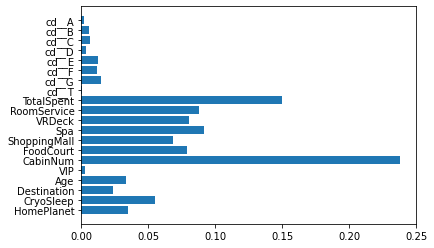

In [100]:
plt.barh(X_train.columns,random_forest.feature_importances_)

## Making Predictions

In [101]:
X=testdf[cols_keep]
imp=SimpleImputer(missing_values=np.nan,strategy='median')#missing_values=np.nan
imp.fit(X)
Xtrain=pd.DataFrame(imp.transform(X),columns=X.columns)
Xtrain=pd.merge(Xtrain,testdf[cd_cols],left_index=True,right_index=True)

In [102]:
Y_pred = random_forest.predict(Xtrain)
Y_pred.astype(bool)

array([ True, False,  True, ...,  True,  True,  True])

In [103]:
sub=pd.read_csv('sample_submission.csv')
sub['Transported']=Y_pred
sub=sub.replace({0:False,1:True})
sub.to_csv('submission.csv', index=False)